<a href="https://colab.research.google.com/github/JudithPadron/Inteligencia-Artificial-JC/blob/main/Perceptr%C3%B3nPersonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón multicapa Arrhythmia
Implementación del algoritmo donde aprende dos clases (Normal, Ischemic)

## Librerias

*   **NumPy** para operaciones con matrices y álgebra lineal.
*   **Pandas** Para manipulación y procesamiento de datos, en este caso utilizado para cargar el conjunto de datos Arrhythmia desde el repositorio UCI.
*   **Matplotlib** visualización de datos.

El constructor Perceptron(object) inicializa el perceptrón con tres parámetros:

*   **eta:** tasa de aprendizaje, que controla cuándo se ajustan los pesos en cada paso.
*   **n_iter:** número de iteraciones o épocas.
*   **random_state:** garantiza reproducibilidad, inicializa los pesos de manera aleatoria.

**Método fit:**
El método fit ajusta los pesos del perceptrón en función de los datos de entrenamiento.

*   La variable X es la matriz de características que contiene dos variables del dataset Arrhythmia.
*   La variable y contiene las etiquetas correspondientes de la clase normal y clase Ischemic.

Los pesos **(self.w_)** se inicializan aleatoriamente utilizando una distribución normal con una media de 0.0 y una desviación estándar pequeña. Se incluye un peso adicional para el sesgo en la posición **self.w_[0]**, lo cual permite ajustar la predicción de forma global.

**Métodos Auxiliares:**
*   **net_input:** Este método calcula la suma ponderada de las entradas y los pesos, que es la base de la predicción. Esto implica que para cada muestra, se calcula el producto escalar entre las características X y los pesos, y se le suma el sesgo.
*   **predict:** Esto significa que si el resultado de la suma ponderada es mayor o igual a 0, se predice la clase 1, y si es menor que 0, se predice la clase -1. Para el dataset Arrhythmia, la clase 1 es Ischemic, y la clase -1 representaría a los pacientes normales.


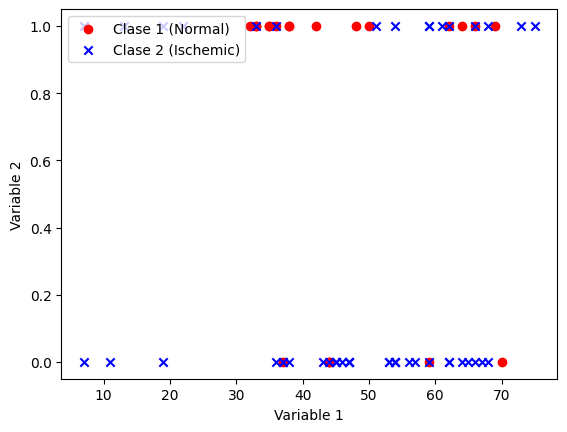

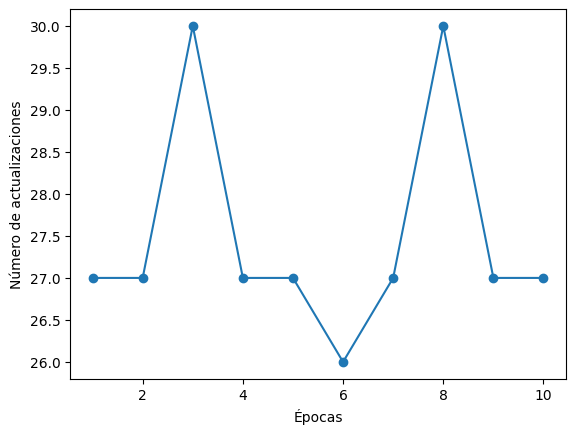

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Cargar el dataset Arrhythmia
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None)

# Seleccionar dos clases para clasificación binaria
# Clase 1: Pacientes normales (etiqueta 1) y clase 2: Ischemic (etiqueta 2)
# Arrhythmia tiene 16 clases, se ajusta para que sea binario.
df = df.replace('?', np.nan)
df = df.dropna()

y = df.iloc[:, -1].values
y = np.where(y == 1, -1, 1)  # Clase 1 será -1, y clase 2 será 1

# Selecciona las características deseadas, en este caso seleccionaremos 2 columnas
X = df.iloc[:, [0, 1]].values

# Graficar los datos
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='Clase 1 (Normal)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Clase 2 (Ischemic)')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend(loc='upper left')
plt.show()

# Entrenar el modelo de perceptrón con el dataset Arrhythmia
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el número de errores por cada época
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.show()